# 1) Installings:

In [1]:
!pip install alpha_vantage pandas numpy yfinance matplotlib tensorflow torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

#2) Librarires:

In [2]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
from alpha_vantage.techindicators import TechIndicators
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
api_key = "ADD_YOUR_API_HERE" #FROM : https://www.alphavantage.co/
ts = TimeSeries(key=api_key, output_format='pandas') # Time Series
ti = TechIndicators(key=api_key, output_format='pandas') # Technical Indicators


In [7]:
# Get daily S&P 500 data (SPY ETF)
data, meta_data = ts.get_daily(symbol='SPY', outputsize='full')
data = data.rename(columns={'1. open': 'open', '2. high': 'high', '3. low': 'low',
                            '4. close': 'close', '5. volume': 'volume'})
data.index = pd.to_datetime(data.index)
data = data.sort_index()
data.head()

,open,high,low,close,volume
date,,,,,
1999-11-01,136.5000,137.0000,135.5625,135.5625,4006500.0
1999-11-02,135.9687,137.2500,134.5937,134.5937,6516900.0
1999-11-03,136.0000,136.3750,135.1250,135.5000,7222300.0
1999-11-04,136.7500,137.3593,135.7656,136.5312,7907500.0
1999-11-05,138.6250,139.1093,136.7812,137.8750,7431500.0


In [8]:
from alpha_vantage.techindicators import TechIndicators

ti = TechIndicators(key=api_key, output_format='pandas')

# Fetch 20-day Simple Moving Average (MA)
sma_data, _ = ti.get_sma(symbol='SPY', interval='daily', time_period=20)
sma_data = sma_data.rename(columns={'SMA': 'sma_20'})

# Fetch 14-day Relative Strength Index (RSI)
rsi_data, _ = ti.get_rsi(symbol='SPY', interval='daily', time_period=14)
rsi_data = rsi_data.rename(columns={'RSI': 'rsi_14'})


# Add Bollinger Bands
bbands_data, _ = ti.get_bbands(symbol='SPY', interval='daily', time_period=20)
bbands_data = bbands_data.rename(columns={'Real Upper Band': 'bb_upper', 'Real Middle Band': 'bb_middle', 'Real Lower Band': 'bb_lower'})


# Merge data into a single DataFrame
df = data[['close', 'volume']].join([sma_data, rsi_data, bbands_data], how='inner')
df = df.dropna()  # Remove rows with missing values

In [9]:
df.head()

,close,volume,sma_20,rsi_14,bb_upper,bb_middle,bb_lower
date,,,,,,,
1999-11-29,140.9375,7348600.0,88.2546,65.8946,91.4990,88.2546,85.0102
1999-11-30,139.2812,7682000.0,88.3724,56.5202,91.4260,88.3724,85.3187
1999-12-01,140.4062,6980200.0,88.5564,60.6184,91.2579,88.5564,85.8550
1999-12-02,141.2500,6698300.0,88.7385,63.4045,91.1537,88.7385,86.3234
1999-12-03,143.8437,10045400.0,88.9701,70.3486,91.3605,88.9701,86.5797


In [10]:
df['time_idx'] = range(len(df))  # Sequential time index for TFT
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df['year'] = df.index.year

In [12]:
df.head()

,close,volume,sma_20,rsi_14,bb_upper,bb_middle,bb_lower,time_idx,day_of_week,month,year
date,,,,,,,,,,,
1999-11-29,140.9375,7348600.0,88.2546,65.8946,91.4990,88.2546,85.0102,0,0,11,1999
1999-11-30,139.2812,7682000.0,88.3724,56.5202,91.4260,88.3724,85.3187,1,1,11,1999
1999-12-01,140.4062,6980200.0,88.5564,60.6184,91.2579,88.5564,85.8550,2,2,12,1999
1999-12-02,141.2500,6698300.0,88.7385,63.4045,91.1537,88.7385,86.3234,3,3,12,1999
1999-12-03,143.8437,10045400.0,88.9701,70.3486,91.3605,88.9701,86.5797,4,4,12,1999


In [13]:
df.to_csv('sp500_data.csv')

# Load the Dataset

In [14]:
df = pd.read_csv('sp500_data.csv', parse_dates=['date'], index_col='date')
df = df.sort_index()

In [15]:
df.head()

,close,volume,sma_20,rsi_14,bb_upper,bb_middle,bb_lower,time_idx,day_of_week,month,year
date,,,,,,,,,,,
1999-11-29,140.9375,7348600.0,88.2546,65.8946,91.4990,88.2546,85.0102,0,0,11,1999
1999-11-30,139.2812,7682000.0,88.3724,56.5202,91.4260,88.3724,85.3187,1,1,11,1999
1999-12-01,140.4062,6980200.0,88.5564,60.6184,91.2579,88.5564,85.8550,2,2,12,1999
1999-12-02,141.2500,6698300.0,88.7385,63.4045,91.1537,88.7385,86.3234,3,3,12,1999
1999-12-03,143.8437,10045400.0,88.9701,70.3486,91.3605,88.9701,86.5797,4,4,12,1999


# External Data Economic News Sentiment : (NewsAPI)

In [16]:
import requests
from textblob import TextBlob

In [ ]:
# Fetch news data 
news_api_key = "ADD_YOUR_API_HERE" #FROM :https://newsapi.org/
url = f"https://newsapi.org/v2/everything?q=S&P+500&apiKey={news_api_key}"
news_data = requests.get(url).json()


In [18]:
# Check for API errors
if news_data.get('status') != 'ok':
    print(f"Error: {news_data.get('message', 'Unknown error')}")
else:
    # Convert to DataFrame and calculate sentiment
    news_df = pd.DataFrame(news_data['articles'])
    news_df['date'] = pd.to_datetime(news_df['publishedAt'].str[:10])  # Extract date
    news_df['sentiment'] = news_df['title'].apply(lambda x: TextBlob(x).sentiment.polarity)
    daily_sentiment = news_df.groupby('date')['sentiment'].mean().rename('news_sentiment')

# External Data :Interest Rates (FRED API)

In [19]:
!pip install --upgrade pandas-datareader
!pip install fredapi

In [20]:
import pandas_datareader as pdr
from datetime import datetime
from fredapi import Fred

In [ ]:
fred = Fred(api_key='ADD_YOUR_API_HERE')  # FROM :https://fred.stlouisfed.org/docs/api/api_key.html
start_date = '2010-01-01'

# Fetch interest rates
fedfunds = fred.get_series('FEDFUNDS', start_date=start_date).rename('fed_funds_rate')
gs10 = fred.get_series('GS10', start_date=start_date).rename('10yr_treasury_rate')


# Combine into a DataFrame
rates_df = pd.concat([fedfunds, gs10], axis=1)

In [22]:
rates_df.tail()

,fed_funds_rate,10yr_treasury_rate
2025-01-01,4.33,4.63
2025-02-01,4.33,4.45
2025-03-01,4.33,4.28
2025-04-01,4.33,4.28
2025-05-01,4.33,4.42


# Merge All Data

In [23]:
# Merge sentiment and interest rates with S&P 500 data
df = df.merge(daily_sentiment, left_index=True, right_index=True, how='left')
df = df.merge(rates_df, left_index=True, right_index=True, how='left')

# Forward-fill missing values (interest rates change infrequently)
df[['fed_funds_rate', '10yr_treasury_rate']] = df[['fed_funds_rate', '10yr_treasury_rate']].fillna(method='ffill')

# Fill missing sentiment with neutral (0)
df['news_sentiment'] = df['news_sentiment'].fillna(0)

<ipython-input-23-1682338570>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[['fed_funds_rate', '10yr_treasury_rate']] = df[['fed_funds_rate', '10yr_treasury_rate']].fillna(method='ffill')


In [24]:
df.tail()

,close,volume,sma_20,rsi_14,bb_upper,bb_middle,bb_lower,time_idx,day_of_week,month,year,news_sentiment,fed_funds_rate,10yr_treasury_rate
date,,,,,,,,,,,,,,
2025-06-04,595.93,57314199.0,585.4220,64.3538,605.9734,585.4220,564.8706,6417,2,6,2025,0.000000,4.33,4.42
2025-06-05,593.05,92436397.0,587.0170,61.3085,604.5097,587.0170,569.5243,6418,3,6,2025,-0.083333,4.33,4.42
2025-06-06,599.14,66588743.0,588.7210,65.0724,603.7992,588.7210,573.6428,6419,4,6,2025,0.102814,4.33,4.42
2025-06-09,599.68,53016418.0,590.4880,65.3938,601.4423,590.4880,579.5337,6420,0,6,2025,0.102273,4.33,4.42
2025-06-10,603.08,66246973.0,591.4925,67.4267,603.1727,591.4925,579.8123,6421,1,6,2025,0.131960,4.33,4.42


In [25]:
print(df.dtypes)

close                 float64
volume                float64
sma_20                float64
rsi_14                float64
bb_upper              float64
bb_middle             float64
bb_lower              float64
time_idx                int64
day_of_week             int64
month                   int64
year                    int64
news_sentiment        float64
fed_funds_rate        float64
10yr_treasury_rate    float64
dtype: object


# Feature Engineering

In [26]:
# Lag Features (avoid lookahead bias)
df['close_lag_1'] = df['close'].shift(1)  # Previous day's close
df['close_lag_7'] = df['close'].shift(7)  # Last week's close
df['close_lag_30'] = df['close'].shift(30)
df['close_lag_252'] = df['close'].shift(252)

# Rolling Statistics
df['rolling_7_mean'] = df['close'].rolling(7).mean()  # Weekly average
df['rolling_30_std'] = df['close'].rolling(30).std()   # Monthly volatility

# Lag External Factors
df['sentiment_lag_1'] = df['news_sentiment'].shift(1)
df['fed_funds_lag_1'] = df['fed_funds_rate'].shift(1)
df['10yr_treasury_lag_1'] = df['10yr_treasury_rate'].shift(1)

# Drop rows with NaN (from lags/rolling windows)
df = df.dropna()

# Train/Test Split (Time-Based)

In [27]:
train_size = int(0.8 * len(df))
train = df.iloc[:train_size]
test = df.iloc[train_size:]

# Feature Normalization

In [28]:
from sklearn.preprocessing import MinMaxScaler

# Columns to scale (exclude time_idx, target, and categoricals)
scale_cols = ['close', 'volume', 'sma_20', 'rsi_14', 'bb_upper', 'bb_middle', 'bb_lower',
              'news_sentiment', 'fed_funds_rate', '10yr_treasury_rate',
              'rolling_7_mean', 'rolling_30_std',
              'close_lag_1', 'close_lag_7', 'close_lag_30', 'close_lag_252']

scaler = MinMaxScaler(feature_range=(0, 1))
train.loc[:, scale_cols] = scaler.fit_transform(train[scale_cols])
test.loc[:, scale_cols] = scaler.transform(test[scale_cols])


# Target Variable

In [29]:
# Predict next day's close price
train.loc[:, 'target'] = train['close'].shift(-1)
test.loc[:, 'target'] = test['close'].shift(-1)



<ipython-input-29-1205463736>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[:, 'target'] = train['close'].shift(-1)
<ipython-input-29-1205463736>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'target'] = test['close'].shift(-1)


In [30]:
# Drop the last row (no target)
train = train.dropna()
test = test.dropna()

In [31]:
df.head()

,close,volume,sma_20,rsi_14,bb_upper,bb_middle,bb_lower,time_idx,day_of_week,month,...,10yr_treasury_rate,close_lag_1,close_lag_7,close_lag_30,close_lag_252,rolling_7_mean,rolling_30_std,sentiment_lag_1,fed_funds_lag_1,10yr_treasury_lag_1
date,,,,,,,,,,,,,,,,,,,,,
2000-11-27,0.251346,0.006684,0.135902,0.399664,0.134050,0.135902,0.144541,252,0,11,...,1.000000,0.246951,0.264414,0.257013,0.313183,0.244357,0.066003,0.0,6.51,5.72
2000-11-28,0.242673,0.005931,0.135033,0.337680,0.133975,0.135033,0.142868,253,1,11,...,1.000000,0.251346,0.256319,0.259325,0.306060,0.242384,0.069249,0.0,6.51,5.72
2000-11-29,0.241748,0.007743,0.133825,0.331323,0.132924,0.133825,0.141579,254,2,11,...,1.000000,0.242673,0.253601,0.246605,0.310898,0.240670,0.070806,0.0,6.51,5.72
2000-11-30,0.237469,0.012667,0.132531,0.301634,0.132013,0.132531,0.139965,255,3,11,...,1.000000,0.241748,0.246373,0.244754,0.314527,0.239383,0.073498,0.0,6.51,5.72
2000-12-01,0.237238,0.008516,0.131200,0.300002,0.130670,0.131200,0.138747,256,4,12,...,0.905882,0.237469,0.248918,0.263489,0.325680,0.237694,0.077932,0.0,6.51,5.72


In [32]:
print(df.dtypes)

close                  float64
volume                 float64
sma_20                 float64
rsi_14                 float64
bb_upper               float64
bb_middle              float64
bb_lower               float64
time_idx                 int64
day_of_week              int64
month                    int64
year                     int64
news_sentiment         float64
fed_funds_rate         float64
10yr_treasury_rate     float64
close_lag_1            float64
close_lag_7            float64
close_lag_30           float64
close_lag_252          float64
rolling_7_mean         float64
rolling_30_std         float64
sentiment_lag_1        float64
fed_funds_lag_1        float64
10yr_treasury_lag_1    float64
dtype: object


# TCN


In [34]:
!pip install torch pytorch-lightning


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.1/823.1 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.5/962.5 kB 53.0 MB/s eta 0:00:00


In [ ]:
!pip install keras-tcn


In [37]:
!pip install PyWavelets


In [36]:
import torch
import torch.nn as nn
import pytorch_lightning as pl
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tcn import TCN
import matplotlib.pyplot as plt


In [38]:
class TCNModel(pl.LightningModule):
    def __init__(self, input_size=5, output_size=1, num_channels=[64, 64, 64], kernel_size=3, dropout=0.2):
        super().__init__()
        self.tcn = nn.Sequential(
            # Layer 1
            nn.Conv1d(input_size, num_channels[0], kernel_size, padding=(kernel_size - 1)),
            nn.ReLU(),
            nn.Dropout(dropout),

            # Layer 2 (dilated)
            nn.Conv1d(num_channels[0], num_channels[1], kernel_size, dilation=2, padding=2*(kernel_size - 1)),
            nn.ReLU(),
            nn.Dropout(dropout),

            # Layer 3 (more dilated)
            nn.Conv1d(num_channels[1], num_channels[2], kernel_size, dilation=4, padding=4*(kernel_size - 1)),
            nn.ReLU(),
            nn.Dropout(dropout),

            # Output
            nn.AdaptiveAvgPool1d(1),
            nn.Flatten(),
            nn.Linear(num_channels[2], output_size)
        )
        self.loss_fn = nn.MSELoss()

    def forward(self, x):
        # x shape: [batch_size, features, sequence_length]
        return self.tcn(x).squeeze(-1)  # Output shape: [batch_size]

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = self.loss_fn(y_hat, y)
        self.log("train_loss", loss, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = self.loss_fn(y_hat, y)
        self.log("val_loss", loss, prog_bar=True)
        return loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.001)

In [39]:
feature_cols = [
    'close', 'volume', 'sma_20', 'rsi_14', 'bb_upper', 'bb_middle', 'bb_lower',
    'time_idx', 'day_of_week', 'month', 'year', 'news_sentiment',
    'fed_funds_rate', '10yr_treasury_rate', 'close_lag_1', 'close_lag_7',
    'close_lag_30', 'close_lag_252', 'rolling_7_mean', 'rolling_30_std',
    'sentiment_lag_1', 'fed_funds_lag_1', '10yr_treasury_lag_1'
]

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[feature_cols])


In [40]:
import matplotlib.pyplot as plt
import pywt
import numpy as np

def wavelet_denoise(signal, wavelet='db4', level=1):
    coeff = pywt.wavedec(signal, wavelet, mode="per")
    sigma = np.median(np.abs(coeff[-level])) / 0.6745
    uthresh = sigma * np.sqrt(2 * np.log(len(signal)))
    coeff[1:] = [pywt.threshold(c, value=uthresh, mode='soft') for c in coeff[1:]]
    return pywt.waverec(coeff, wavelet, mode="per")[:len(signal)]  # Match length exactly


In [41]:
denoise_cols = [
    'close', 'volume', 'sma_20', 'rsi_14', 'bb_upper', 'bb_middle', 'bb_lower',
    'close_lag_1', 'close_lag_7', 'close_lag_30', 'close_lag_252',
    'rolling_7_mean', 'rolling_30_std'
]

# Apply denoising
for col in denoise_cols:
    train[col] = wavelet_denoise(train[col].values)
    test[col] = wavelet_denoise(test[col].values)

# Optional: reclip to [0, 1] if you notice the denoised values go out of range
train[denoise_cols] = np.clip(train[denoise_cols], 0, 1)
test[denoise_cols] = np.clip(test[denoise_cols], 0, 1)


INFO:pytorch_lightning.utilities.rank_zero:Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs



Training with sequence length: 50


/usr/local/lib/python3.11/dist-packages/pytorch_lightning/trainer/configuration_validator.py:70: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type       | Params | Mode 
-----------------------------------------------
0 | tcn     | Sequential | 29.2 K | train
1 | loss_fn | MSELoss    | 0      | train
-----------------------------------------------
29.2 K    Trainable params
0         Non-trainable params
29.2 K    Total params
0.117     Total estimated model params size (MB)
14        Modules in train mode
0         Modules in eval mode
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.
INFO:pytorch_lightning.utilities.rank_zero:Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning 


Training with sequence length: 100


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.
INFO:pytorch_lightning.utilities.rank_zero:Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.



Training with sequence length: 150


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type       | Params | Mode 
-----------------------------------------------
0 | tcn     | Sequential | 29.2 K | train
1 | loss_fn | MSELoss    | 0      | train
-----------------------------------------------
29.2 K    Trainable params
0         Non-trainable params
29.2 K    Total params
0.117     Total estimated model params size (MB)
14        Modules in train mode
0         Modules in eval mode
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.



Training with sequence length: 200


INFO:pytorch_lightning.utilities.rank_zero:Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type       | Params | Mode 
-----------------------------------------------
0 | tcn     | Sequential | 29.2 K | train
1 | loss_fn | MSELoss    | 0      | train
-----------------------------------------------
29.2 K    Trainable params
0         Non-trainable params
29.2 K    Total params
0.117     Total estimated model params size (MB)
14        Modules in train mode
0         Modules in eval mode
INFO:pyt

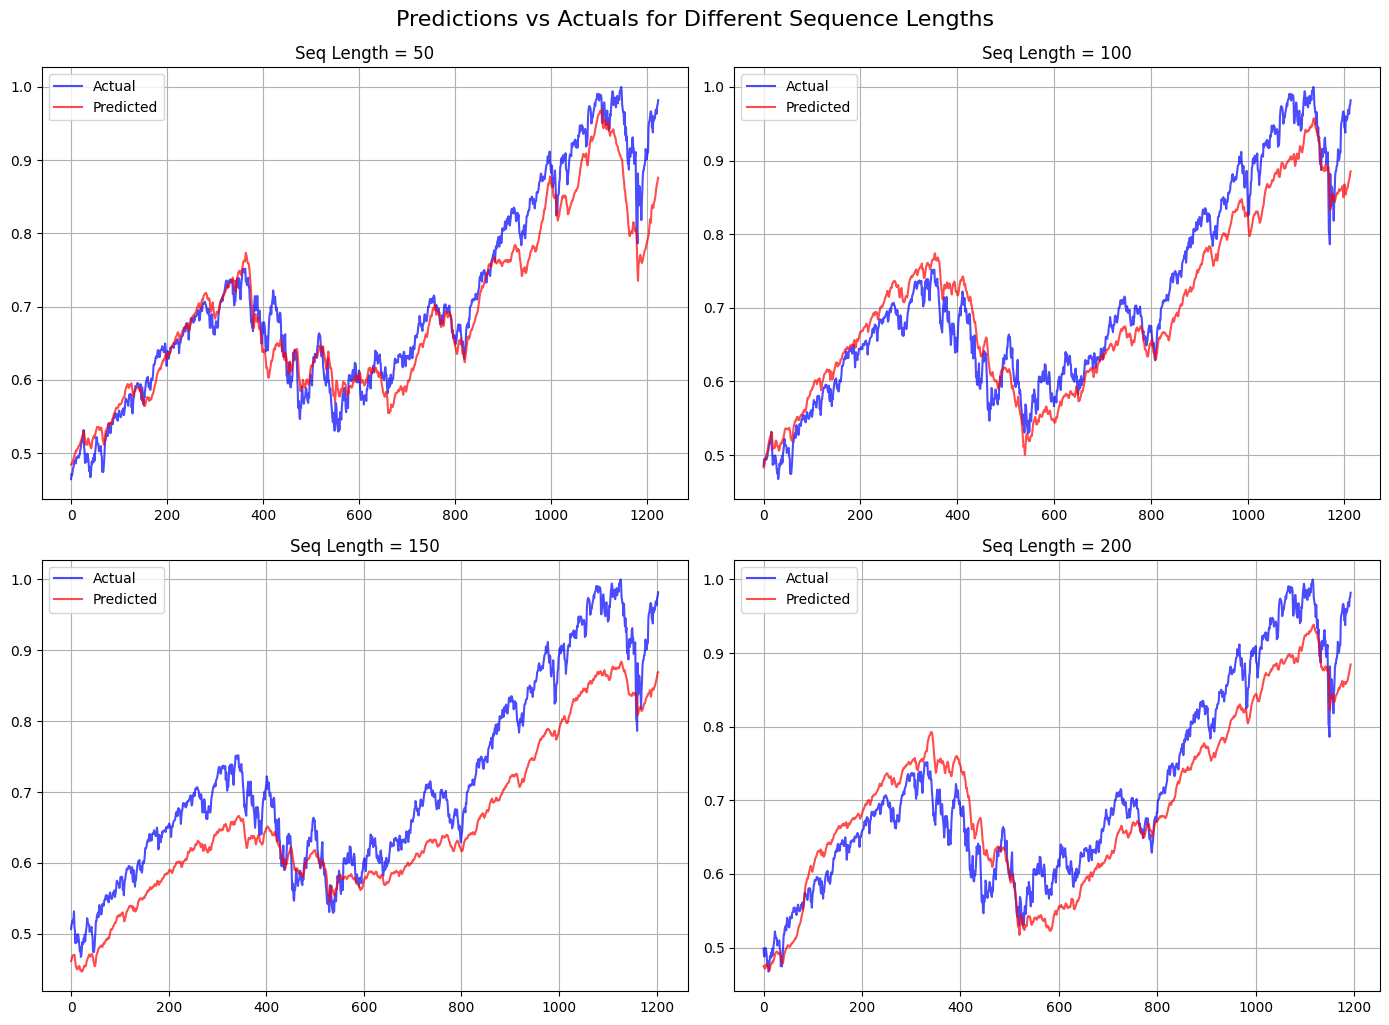

In [42]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length, 0])  #  target is column 0
    return np.array(X), np.array(y)

seq_lengths = [50, 100, 150, 200]
results = {}

for seq_length in seq_lengths:
    print(f"\nTraining with sequence length: {seq_length}")
    X, y = create_sequences(scaled_data, seq_length)

    # Train-test split
    train_size = int(0.8 * len(X))
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Convert to tensors and reshape for Conv1D
    X_train = torch.tensor(X_train, dtype=torch.float32).permute(0, 2, 1)
    X_test = torch.tensor(X_test, dtype=torch.float32).permute(0, 2, 1)
    y_train = torch.tensor(y_train, dtype=torch.float32)
    y_test = torch.tensor(y_test, dtype=torch.float32)

    # DataLoaders
    train_dataset = TensorDataset(X_train, y_train)
    test_dataset = TensorDataset(X_test, y_test)
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=64)

    # Init model
    model = TCNModel(
        input_size=X_train.shape[1],
        output_size=1,
        num_channels=[64, 64, 64],
        kernel_size=3,
        dropout=0.2
    )

    # Train
    trainer = pl.Trainer(max_epochs=50, accelerator="auto", enable_progress_bar=False)
    trainer.fit(model, train_loader)

    # Evaluate
    model.eval()
    preds, targets = [], []
    for xb, yb in test_loader:
        with torch.no_grad():
            y_pred = model(xb).squeeze()
            preds.append(y_pred.cpu())
            targets.append(yb.cpu())

    preds = torch.cat(preds).numpy()
    targets = torch.cat(targets).numpy()

    results[seq_length] = (targets, preds)


# plot
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

for i, seq_length in enumerate(seq_lengths):
    actual, predicted = results[seq_length]
    axs[i].plot(actual, label="Actual", color="blue", alpha=0.7)
    axs[i].plot(predicted, label="Predicted", color="red", alpha=0.7)
    axs[i].set_title(f"Seq Length = {seq_length}")
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.suptitle("Predictions vs Actuals for Different Sequence Lengths", fontsize=16, y=1.02)
plt.show()


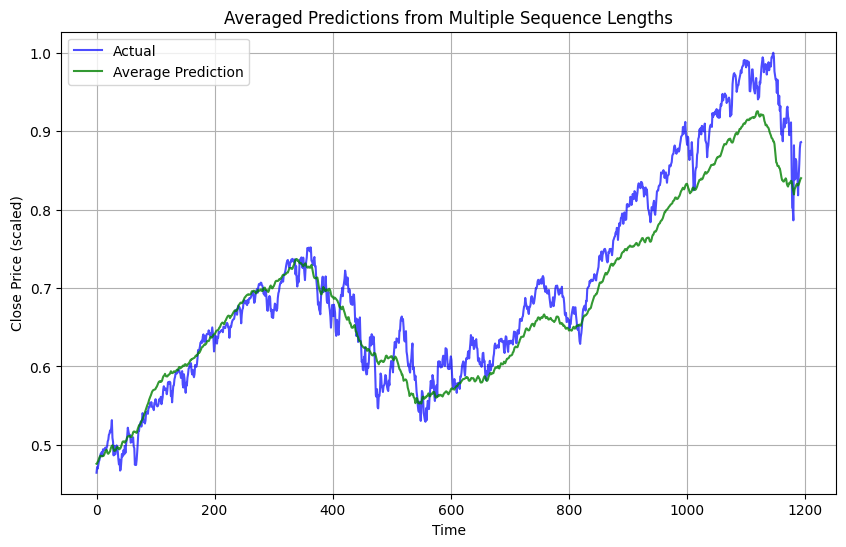

In [43]:
import numpy as np

# Align all predictions to the shortest length
min_len = min(len(v[0]) for v in results.values())

# Stack predictions
all_preds = []
for seq_length in seq_lengths:
    actual, pred = results[seq_length]
    all_preds.append(pred[:min_len])  # Align length

# Compute average prediction
avg_pred = np.mean(np.stack(all_preds), axis=0)
avg_actual = results[seq_lengths[0]][0][:min_len]  # Use any aligned actual

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(avg_actual, label="Actual", color="blue", alpha=0.7)
plt.plot(avg_pred, label="Average Prediction", color="green", alpha=0.8)
plt.title("Averaged Predictions from Multiple Sequence Lengths")
plt.xlabel("Time")
plt.ylabel("Close Price (scaled)")
plt.legend()
plt.grid(True)
plt.show()


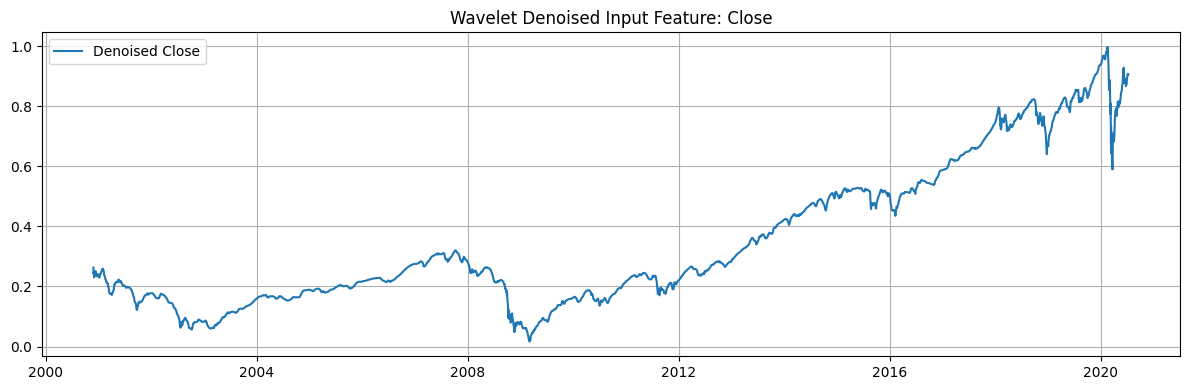

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(train['close'], label='Denoised Close')
plt.title('Wavelet Denoised Input Feature: Close')
plt.legend(); plt.grid(); plt.tight_layout(); plt.show()


In [69]:
seq_lengths = [30, 50, 100, 200]

def create_multi_scale_sequences(data, seq_lengths):
    X_dict = {seq_len: [] for seq_len in seq_lengths}
    y = []
    max_len = max(seq_lengths)

    for i in range(len(data) - max_len):
        y.append(data[i + max_len, 0])  # Target is always offset by max lookback
        for seq_len in seq_lengths:
            X_dict[seq_len].append(data[i + max_len - seq_len:i + max_len])

    # Convert to arrays and align dimensions
    X_dict = {k: np.array(v) for k, v in X_dict.items()}
    y = np.array(y)
    return X_dict, y


In [70]:
X_dict, y = create_multi_scale_sequences(scaled_data, seq_lengths)

# Train-test split
train_size = int(0.8 * len(y))
X_train_dict = {k: v[:train_size] for k, v in X_dict.items()}
X_test_dict = {k: v[train_size:] for k, v in X_dict.items()}
y_train, y_test = y[:train_size], y[train_size:]

# Convert to tensors
X_train_dict = {k: torch.tensor(v, dtype=torch.float32).permute(0, 2, 1) for k, v in X_train_dict.items()}
X_test_dict = {k: torch.tensor(v, dtype=torch.float32).permute(0, 2, 1) for k, v in X_test_dict.items()}
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)


In [86]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [85]:
class Chomp1d(nn.Module):
    def __init__(self, chomp_size):
        super().__init__()
        self.chomp_size = chomp_size

    def forward(self, x):
        return x[:, :, :-self.chomp_size]

class TemporalBlock(nn.Module):
    def __init__(self, n_inputs, n_outputs, kernel_size, stride, dilation, padding, dropout):
        super().__init__()
        self.conv1 = nn.Conv1d(n_inputs, n_outputs, kernel_size,
                               stride=stride, padding=padding, dilation=dilation)
        self.chomp1 = Chomp1d(padding)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout)

        self.conv2 = nn.Conv1d(n_outputs, n_outputs, kernel_size,
                               stride=stride, padding=padding, dilation=dilation)
        self.chomp2 = Chomp1d(padding)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout)

        self.net = nn.Sequential(self.conv1, self.chomp1, self.relu1, self.dropout1,
                                 self.conv2, self.chomp2, self.relu2, self.dropout2)
        self.downsample = nn.Conv1d(n_inputs, n_outputs, 1) if n_inputs != n_outputs else None
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.net(x)
        res = x if self.downsample is None else self.downsample(x)
        return self.relu(out + res)

class TemporalConvNet(nn.Module):
    def __init__(self, input_size, num_channels, kernel_size=2, dropout=0.2):
        super().__init__()
        layers = []
        num_levels = len(num_channels)
        for i in range(num_levels):
            dilation_size = 2 ** i
            in_channels = input_size if i == 0 else num_channels[i-1]
            out_channels = num_channels[i]
            layers += [TemporalBlock(in_channels, out_channels, kernel_size, stride=1,
                                     dilation=dilation_size, padding=(kernel_size-1)*dilation_size,
                                     dropout=dropout)]
        self.network = nn.Sequential(*layers)

    def forward(self, x):  # x shape: (batch, features, seq_len)
        return self.network(x)


In [87]:
class MultiScaleTCN(nn.Module):
    def __init__(self, input_size, output_size, num_channels, kernel_size, dropout, seq_lengths):
        super().__init__()
        self.seq_lengths = seq_lengths
        self.branches = nn.ModuleDict()

        for seq_len in seq_lengths:
            self.branches[str(seq_len)] = TemporalConvNet(
                input_size=input_size,
                num_channels=num_channels,
                kernel_size=kernel_size,
                dropout=dropout
            )

        self.gate = nn.Sequential(
            nn.Linear(len(seq_lengths), len(seq_lengths)),
            nn.Softmax(dim=1)
        )

        self.fc = nn.Linear(num_channels[-1], output_size)

    def forward(self, X_dict, return_weights=False):  # ✅ Add argument here
        outputs = []
        for seq_len in self.seq_lengths:
            x = X_dict[seq_len]
            out = self.branches[str(seq_len)](x)
            out = out[:, :, -1]  # Get last time step
            out = self.fc(out)
            outputs.append(out.unsqueeze(1))  # shape: (batch, 1, output)

        outputs = torch.cat(outputs, dim=1)  # shape: (batch, num_scales, output)
        weights = self.gate(outputs.detach().squeeze(-1))  # (batch, num_scales)

        final_output = torch.sum(weights.unsqueeze(-1) * outputs, dim=1)  # shape: (batch, output)

        if return_weights:
            return final_output, weights
        return final_output


In [89]:

class LitMultiScaleTCN(pl.LightningModule):
    def __init__(self, input_size, output_size, num_channels, kernel_size, dropout, seq_lengths, lr=1e-3):
        super().__init__()
        self.save_hyperparameters()
        self.model = MultiScaleTCN(
            input_size=input_size,
            output_size=output_size,
            num_channels=num_channels,
            kernel_size=kernel_size,
            dropout=dropout,
            seq_lengths=seq_lengths
        )
        self.loss_fn = nn.MSELoss()
        self.lr = lr

    def forward(self, X_dict, return_weights=False):
        return self.model(X_dict, return_weights=return_weights)

    def training_step(self, batch, batch_idx):
        X_dict, y = batch
        y_hat = self(X_dict)
        loss = self.loss_fn(y_hat.squeeze(), y)
        self.log("train_loss", loss)
        return loss

    def validation_step(self, batch, batch_idx):
        X_dict, y = batch
        y_hat = self(X_dict)
        loss = self.loss_fn(y_hat.squeeze(), y)
        self.log("val_loss", loss)

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=self.lr)


In [90]:
from torch.utils.data import Dataset, DataLoader

class MultiScaleDataset(Dataset):
    def __init__(self, X_dict, y):
        self.X_dict = X_dict
        self.y = y
        self.seq_lengths = list(X_dict.keys())
        self.len = y.shape[0]

    def __len__(self):
        return self.len

    def __getitem__(self, idx):
        X_sample = {k: self.X_dict[k][idx] for k in self.seq_lengths}
        y_sample = self.y[idx]
        return X_sample, y_sample


In [91]:
train_dataset = MultiScaleDataset(X_train_dict, y_train)
test_dataset = MultiScaleDataset(X_test_dict, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(test_dataset, batch_size=64)


In [92]:
model = LitMultiScaleTCN(
    input_size=X_train_dict[30].shape[1],  # features
    output_size=1,
    num_channels=[64, 64, 64],
    kernel_size=3,
    dropout=0.2,
    seq_lengths=seq_lengths,
    lr=1e-3
)

trainer = pl.Trainer(max_epochs=50, accelerator='auto')
trainer.fit(model, train_loader, val_loader)


INFO:pytorch_lightning.utilities.rank_zero:Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type          | Params | Mode 
--------------------------------------------------
0 | model   | MultiScaleTCN | 271 K  | train
1 | loss_fn | MSELoss       | 0      | train
--------------------------------------------------
271 K     Trainable params
0         Non-trainable params
271 K     Total params
1.085     Total estimated model params size (MB)
151       Modules in train mode
0         Modules in eva

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.


In [93]:
def get_predictions(model, dataloader):
    model.eval()
    preds, targets = [], []

    with torch.no_grad():
        for batch in dataloader:
            X_dict, y = batch
            y_hat = model(X_dict).squeeze()
            preds.append(y_hat.cpu().numpy())
            targets.append(y.cpu().numpy())

    preds = np.concatenate(preds)
    targets = np.concatenate(targets)
    return preds, targets


In [94]:
preds, targets = get_predictions(model, val_loader)


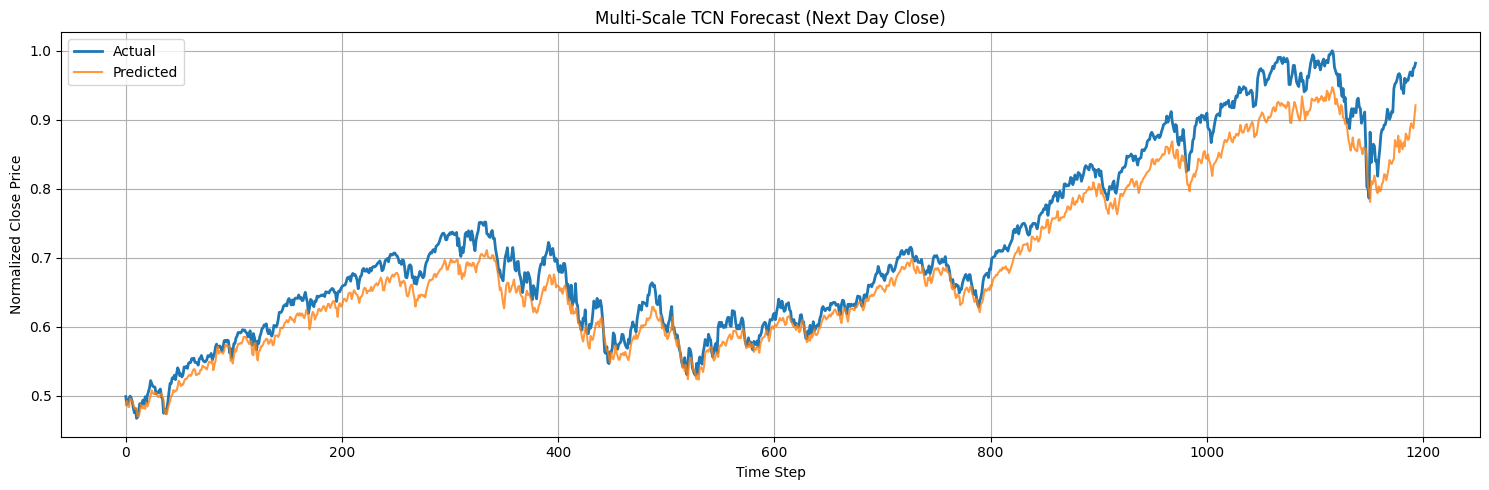

In [95]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(targets, label='Actual', linewidth=2)
plt.plot(preds, label='Predicted', alpha=0.8)
plt.title("Multi-Scale TCN Forecast (Next Day Close)")
plt.xlabel("Time Step")
plt.ylabel("Normalized Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [96]:
def forward(self, X_dict, return_weights=False):
    outputs = []
    for seq_len in self.seq_lengths:
        out = self.branches[str(seq_len)](X_dict[seq_len])
        outputs.append(out.unsqueeze(1))  # (B, 1)

    outputs = torch.cat(outputs, dim=1)  # (B, num_scales)
    weights = self.gate(outputs.detach())

    final_output = torch.sum(weights * outputs, dim=1)

    if return_weights:
        return final_output, weights
    return final_output


In [97]:
def get_predictions_and_weights(model, dataloader):
    model.eval()
    preds, targets, all_weights = [], [], []

    with torch.no_grad():
        for batch in dataloader:
            X_dict, y = batch
            y_hat, weights = model(X_dict, return_weights=True)
            preds.append(y_hat.cpu().numpy())
            targets.append(y.cpu().numpy())
            all_weights.append(weights.cpu().numpy())

    preds = np.concatenate(preds)
    targets = np.concatenate(targets)
    all_weights = np.concatenate(all_weights)
    return preds, targets, all_weights


In [98]:
preds, targets, all_weights = get_predictions_and_weights(model, val_loader)


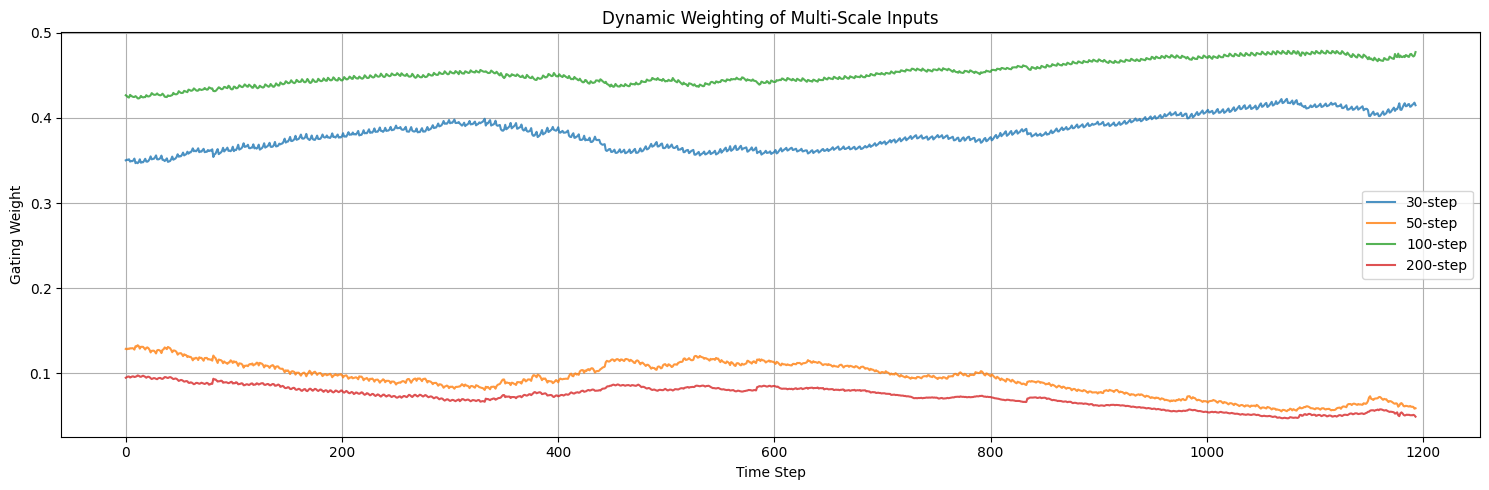

In [99]:
import seaborn as sns

plt.figure(figsize=(15, 5))
for i, seq_len in enumerate(seq_lengths):
    plt.plot(all_weights[:, i], label=f"{seq_len}-step", alpha=0.8)

plt.title("Dynamic Weighting of Multi-Scale Inputs")
plt.xlabel("Time Step")
plt.ylabel("Gating Weight")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
